In [1]:
%load_ext autoreload
%autoreload 2
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import matplotlib.colors as mcolors
from tqdm import tqdm

In [ ]:
# Config
SELECTED_STATIONS = [3, 9]  # change this to try different station sets

# Load processed dataset
cols = ['Date','Hour','Load'] + [f'w{i}' for i in range(1,26)]
df = pd.read_csv('./processed_data/GEFCom2014.csv', usecols=cols)

# Build time column from Date and Hour
# Date format: '1/1/2001', Hour format: 1..24; interpret hour-1 as 0..23
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')
df = df.dropna(subset=['Hour'])
df['Hour'] = df['Hour'].astype(int)

# Convert to datetime
base_dt = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['time'] = base_dt + pd.to_timedelta(df['Hour'] - 1, unit='h')

# Drop initial rows with missing LOAD and coerce numeric
df['LOAD'] = pd.to_numeric(df['Load'], errors='coerce')
df = df.dropna(subset=['LOAD'])

station_cols = [f'w{i}' for i in SELECTED_STATIONS]
df['TEMP_AVG'] = df[station_cols].mean(axis=1)

df = df.sort_values('time')[['time','LOAD','TEMP_AVG']]
print(f"Rows loaded: {len(df)} | Time span: {df['time'].min()} to {df['time'].max()} | Stations: {SELECTED_STATIONS}")


Rows loaded: 61344 | Time span: 2005-01-01 00:00:00 to 2011-12-31 23:00:00 | Stations: [3, 9]


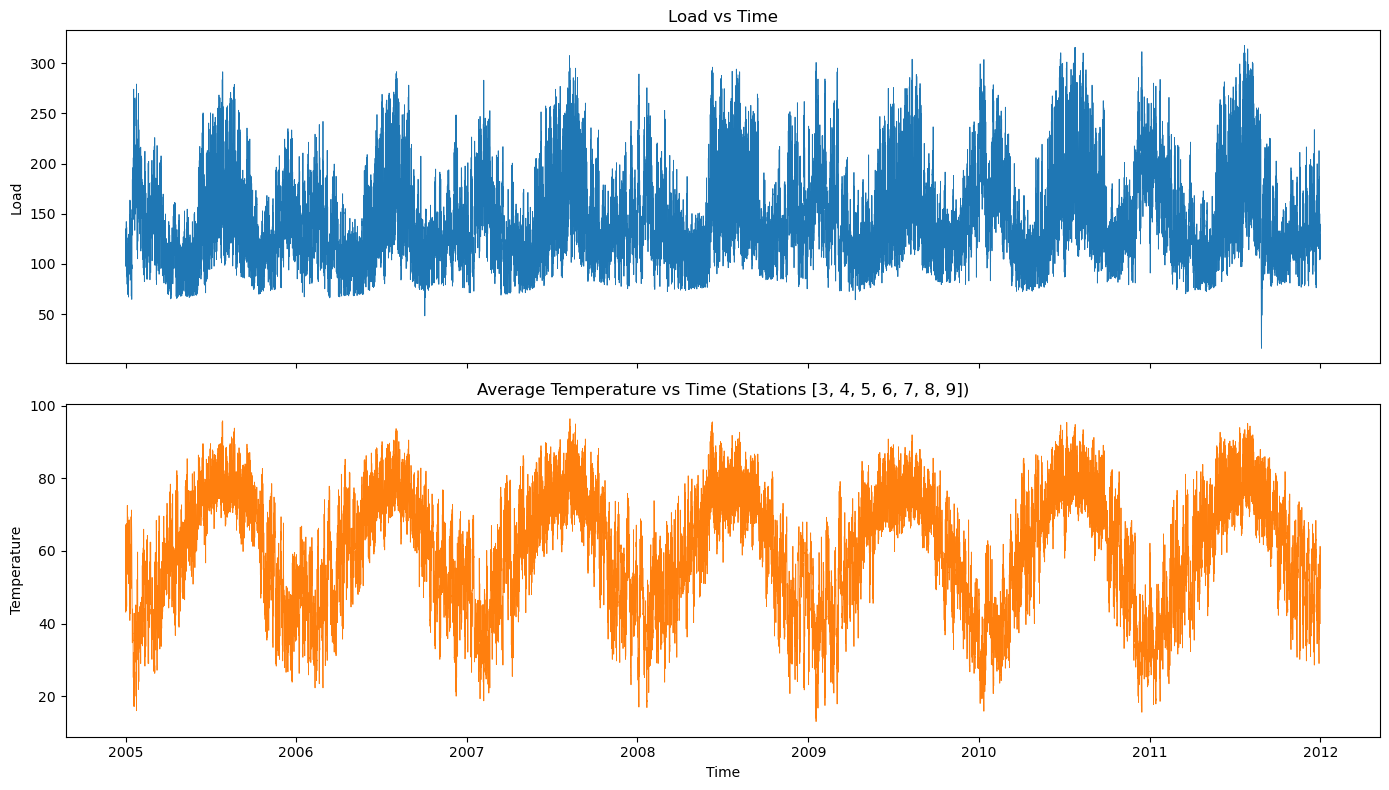

In [12]:
# Time-series plots for load over time and temperature over time 
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Load vs time
sns.lineplot(ax=axes[0], data=df, x='time', y='LOAD', linewidth=0.6)
axes[0].set_title('Load vs Time')
axes[0].set_ylabel('Load')

# Temp vs time
sns.lineplot(ax=axes[1], data=df, x='time', y='TEMP_AVG', linewidth=0.6, color='tab:orange')
axes[1].set_title(f'Average Temperature vs Time (Stations {SELECTED_STATIONS})')
axes[1].set_ylabel('Temperature')

axes[1].set_xlabel('Time')
plt.tight_layout()
plt.show()


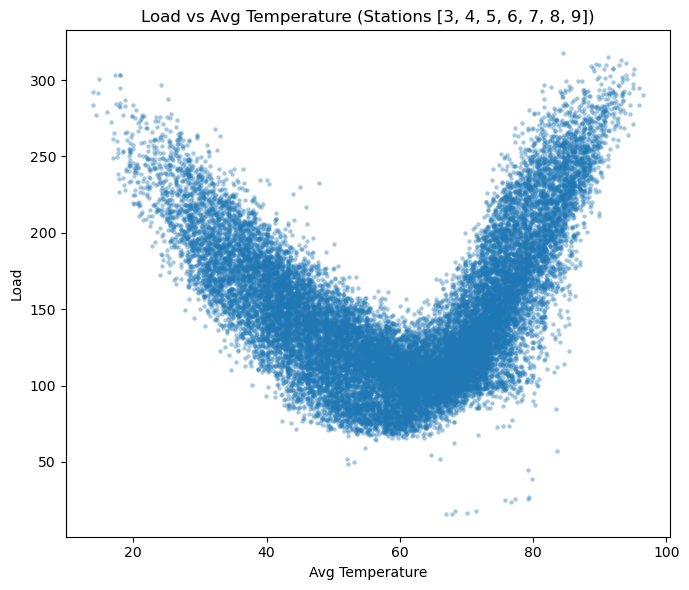

In [13]:
# Scatter plot of load and temperature
plt.figure(figsize=(7, 6))
data_sample = df.sample(min(25000, len(df)), random_state=42) if len(df) > 25000 else df
sns.scatterplot(data=data_sample, x='TEMP_AVG', y='LOAD', s=10, alpha=0.4, linewidth=0)
plt.title(f'Load vs Avg Temperature (Stations {SELECTED_STATIONS})')
plt.xlabel('Avg Temperature')
plt.ylabel('Load')
plt.tight_layout()
plt.show()
